# Exercises in statistics

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`)

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?

In [16]:
import seaborn as sns

# Indlæs datasættet
penguins_data = sns.load_dataset("penguins")

In [17]:
species_count = penguins_data['species'].value_counts()

print(species_count)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?

udfra modelen, kan vi se at attributen er numerisk, men for at vurdere hvorvidt vores variabel er "normalt" fordelt, kan vi ved fordel benytte "histogrammer" og boxplot.  

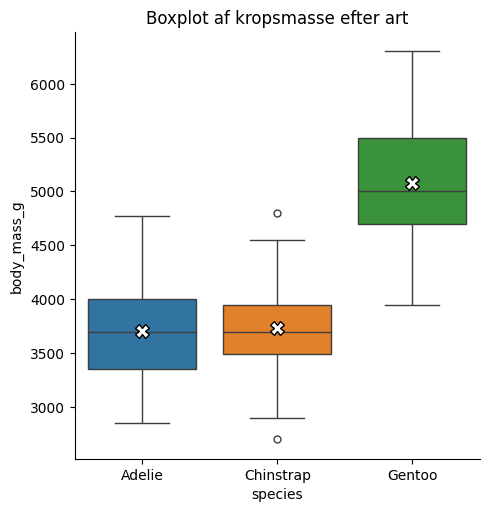

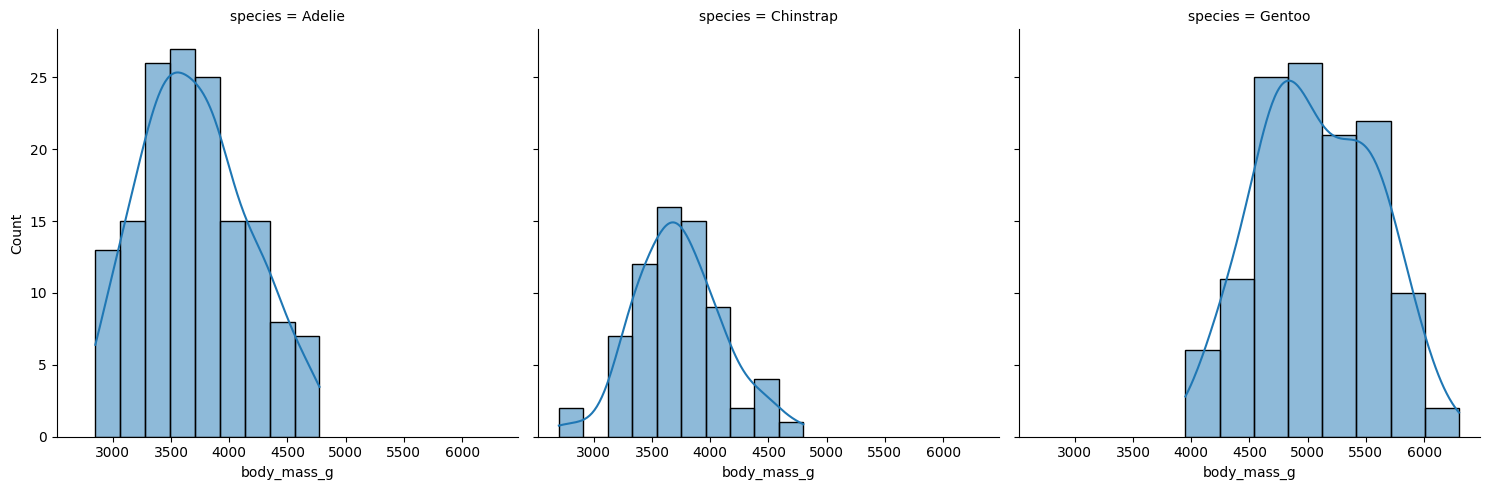

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boxplot
sns.catplot(x="species", y="body_mass_g", hue="species", data=penguins_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot af kropsmasse efter art")
plt.show()

# Histogram
g = sns.FacetGrid(penguins_data, col="species", height=5)
g.map(sns.histplot, "body_mass_g", kde=True)
plt.show()




Identificér variabeltypen:

Vi har en numerisk variabel (body mass).
Er data normalfordelt?

Nej, vores visuelle inspektion viste, at især Chinstrap-pingvinernes kropsmasse ikke er normalfordelt.

Hvad er næste skridt i modellen?

Eftersom data ikke er normalfordelt, spørger vi: Er data paired (parret)?
Nej, vi sammenligner to uafhængige grupper (Adelie og Chinstrap).

Har grupperne samme form på deres fordeling?

Nej, fordelingen ser forskellig ud mellem de to grupper.

Hvilken test skal vi vælge?
 Mann-Whitney U-test er det bedste valg ifølge beslutningstræet.

 Hypoteser
Null-hypotese (H₀): Der er ingen forskel i kropsmasse mellem Adelie- og Chinstrap-pingviner.
Alternativ hypotese (Hₐ): Der er en signifikant forskel i kropsmasse mellem Adelie- og Chinstrap-pingviner.

Signifikansniveau
vivælger et signifikansniveau på 0.05 (5%).

Vi vælger Mann Whitney U test fordi dataen er ikke helt normalt fordelt.

og fordi den sammenligner to uafhængige grupper. 

In [19]:
import pandas as pd
from scipy import stats

# Drop NaN værdier fra 'body_mass_g'
adelie_mass = penguins_data[penguins_data["species"] == "Adelie"]["body_mass_g"].dropna()
chinstrap_mass = penguins_data[penguins_data["species"] == "Chinstrap"]["body_mass_g"].dropna()

# Mann-Whitney U Test
stats.mannwhitneyu(adelie_mass, chinstrap_mass)


MannwhitneyuResult(statistic=4831.0, pvalue=0.4854772721011861)

P-værdi = 0.485 (hvilket er større end 0.05).

Da p-værdien ikke er mindre end 0.05, kan vi ikke afvise nul-hypotesen.
Dette betyder, at der ikke er en signifikant forskel i kropsmassen mellem Adelie- og Chinstrap-pingviner.

In [20]:
import pandas as pd
from scipy import stats

# Drop NaN værdier fra 'body_mass_g'
chinstrap_mass = penguins_data[penguins_data["species"] == "Chinstrap"]["body_mass_g"].dropna()
gentoo_mass = penguins_data[penguins_data["species"] == "Gentoo"]["body_mass_g"].dropna()

# Mann-Whitney U Test
result = stats.mannwhitneyu(chinstrap_mass, gentoo_mass)

print("Mann-Whitney U Test result:", result)


Mann-Whitney U Test result: MannwhitneyuResult(statistic=131.0, pvalue=1.6723632138556386e-28)


Da p-værdien < 0.05, kan vi afvise nul-hypotesen.
Der er statistisk signifikant forskel i kropsmassen mellem Chinstrap- og Gentoo-pingviner

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Indlæs datasættet
data = pd.read_csv("energySoftware.csv")

# Vis de første rækker for at få overblik over datasættet
data.head()


,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671


In [24]:
print(data.columns)


Index(['test', 'PKG', 'CPU', 'nn', 'nn2', 'time'], dtype='object')


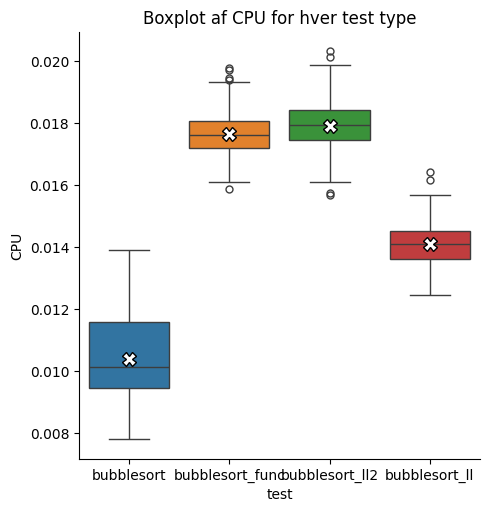

In [35]:
#1 Boxplot af CPU for hver test type
sns.catplot(x="test", y="CPU", hue="test", data=data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot af CPU for hver test type")
plt.show()


Der er nogle outliers i især bubblesort_func og bubblesort_ll2, som kan indikere afvigelser fra normalfordelingen.

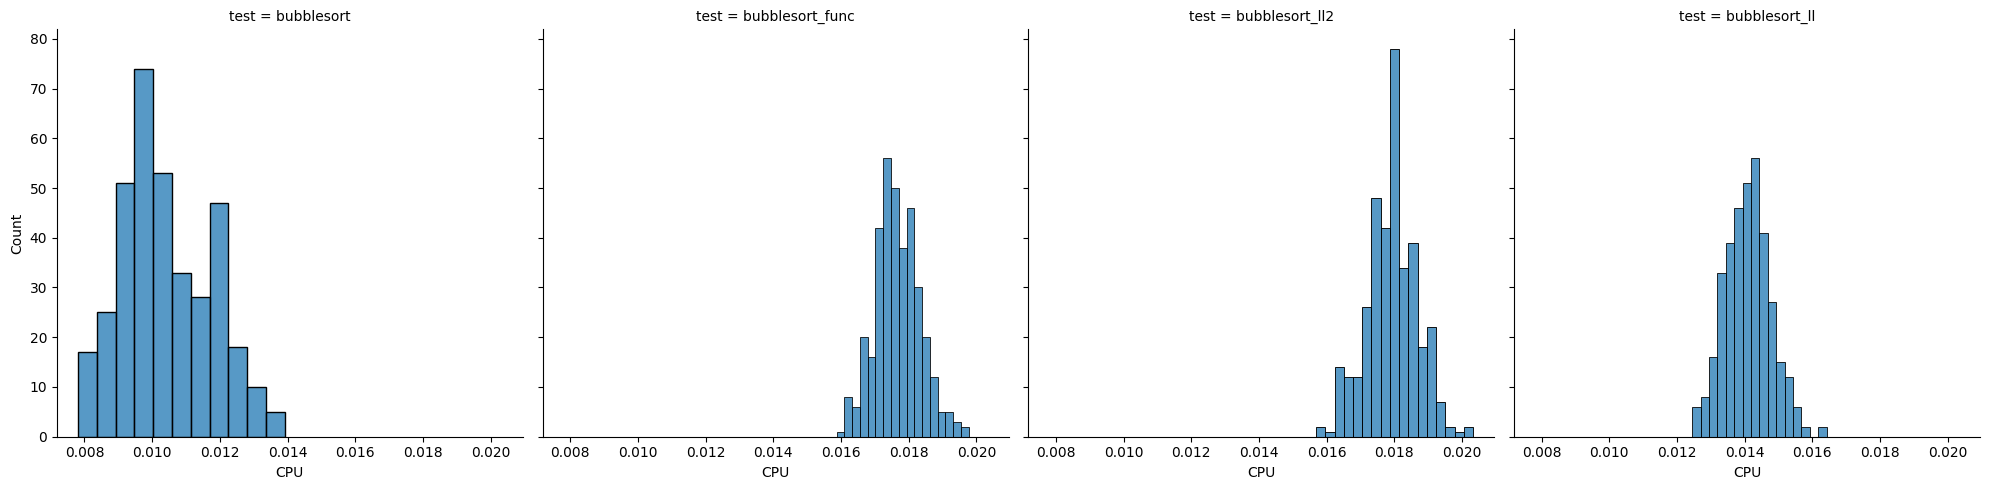

In [26]:
g = sns.FacetGrid(data, col="test", height=5)
g.map(sns.histplot, "CPU")
plt.show()


For sammenligning mellem bubblesort og andre tests vil en ikke-parametrisk test som Mann-Whitney U-test sandsynligvis være mest passende, da der er klare afvigelser fra normalfordelingen.

Null-hypotese (H₀): Der er ingen forskel i CPU-forbruget mellem bubblesort og bubblesort_ll.
Alternativ hypotese (Hₐ): Der er en forskel i CPU-forbruget mellem bubblesort og bubblesort_ll.
Signifikansniveau:
Vi vælger et signifikansniveau på 0.05 (standardniveau).

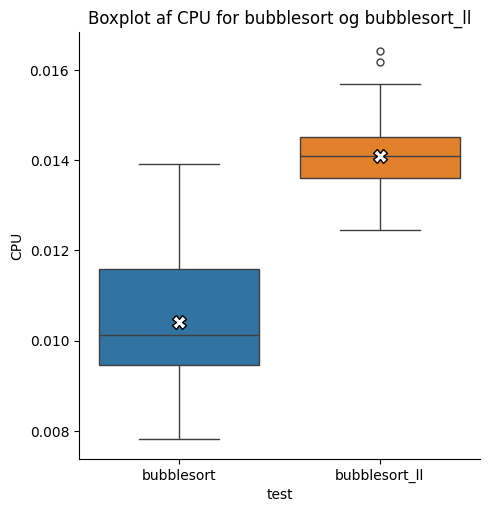

MannwhitneyuResult(statistic=645.5, pvalue=3.79156286604797e-117)


In [ ]:
#2 Drop NaN værdier fra 'CPU'
bubblesort_cpu = data[data["test"] == "bubblesort"]["CPU"].dropna()
bubblesort_ll_cpu = data[data["test"] == "bubblesort_ll"]["CPU"].dropna()

# Boxplot for visuel sammenligning
sns.catplot(x="test", y="CPU", hue="test", data=data[data["test"].isin(["bubblesort", "bubblesort_ll"])], 
            kind="box", showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot af CPU for bubblesort og bubblesort_ll")
plt.show()

# Mann-Whitney U Test
result = stats.mannwhitneyu(bubblesort_cpu, bubblesort_ll_cpu)
print(result)

Der er en statistisk signifikant forskel i CPU-forbruget mellem bubblesort og bubblesort_ll.
Dette betyder, at forskellen ikke kan tilskrives tilfældigheder; bubblesort_ll bruger signifikant mere CPU end bubblesort.

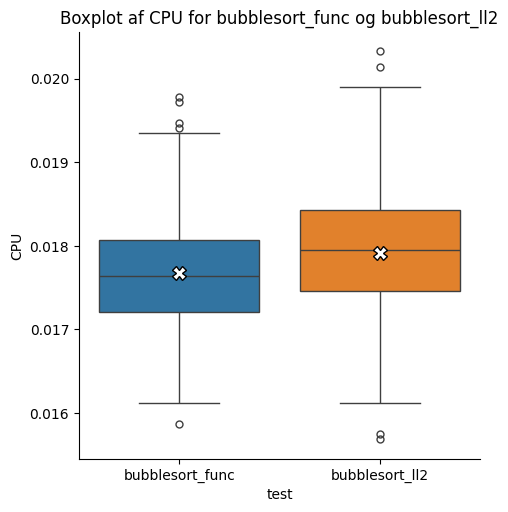

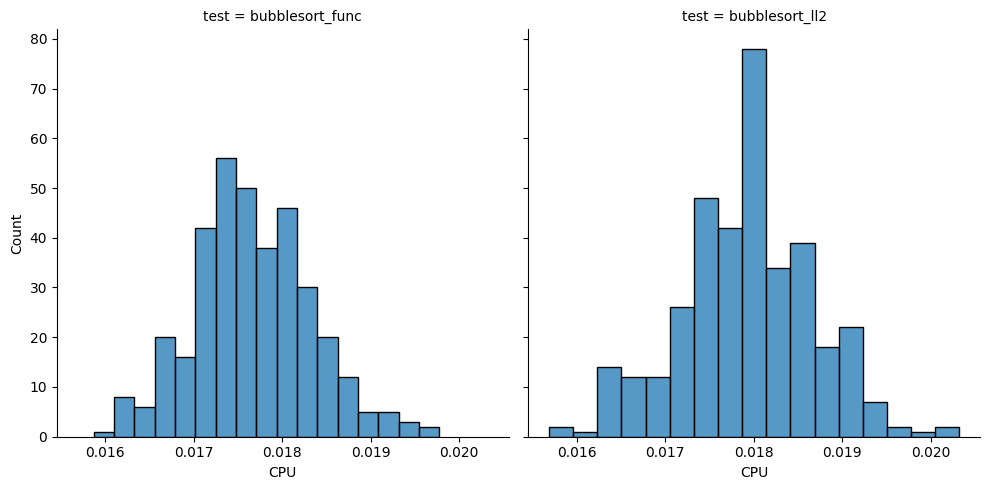

In [28]:
# 3 
# Boxplot for CPU for bubblesort_func og bubblesort_ll2
sns.catplot(x="test", y="CPU", hue="test", data=data[data["test"].isin(["bubblesort_func", "bubblesort_ll2"])],
            kind="box", showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot af CPU for bubblesort_func og bubblesort_ll2")
plt.show()

# Histogram for CPU for bubblesort_func og bubblesort_ll2
g = sns.FacetGrid(data[data["test"].isin(["bubblesort_func", "bubblesort_ll2"])], col="test", height=5)
g.map(sns.histplot, "CPU")
plt.show()


In [33]:
# Drop NaN værdier for 'CPU'
bubblesort_func_cpu = data[data["test"] == "bubblesort_func"]["CPU"].dropna()
bubblesort_ll2_cpu = data[data["test"] == "bubblesort_ll2"]["CPU"].dropna()

# Mann-Whitney U Test
result = stats.mannwhitneyu(bubblesort_func_cpu, bubblesort_ll2_cpu)
print(result)


MannwhitneyuResult(statistic=50920.5, pvalue=6.502153741813431e-07)


Da p-værdien er meget mindre end 0.05, kan vi afvise nulhypotesen.
Nulhypotesen (H₀): Der er ingen forskel i CPU-forbruget mellem bubblesort_func og bubblesort_ll2.
Alternativ hypotese (H₁): Der er en signifikant forskel i CPU-forbruget mellem de to grupper.
Vi konkluderer, at der er en signifikant forskel i CPU-forbruget mellem bubblesort_func og bubblesort_ll2.
og forskellen vurderes som mærkbar ud fra både p-værdien og boxplottets visualisering.

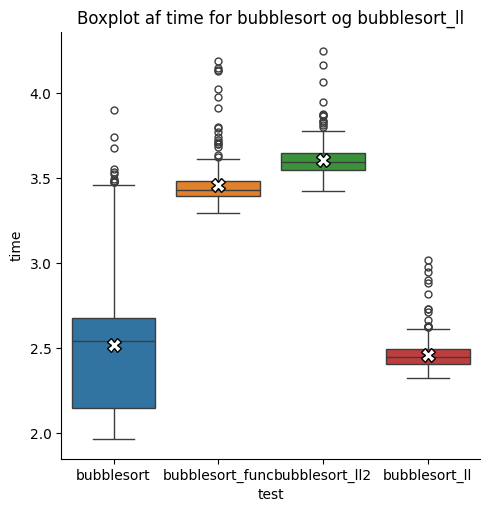

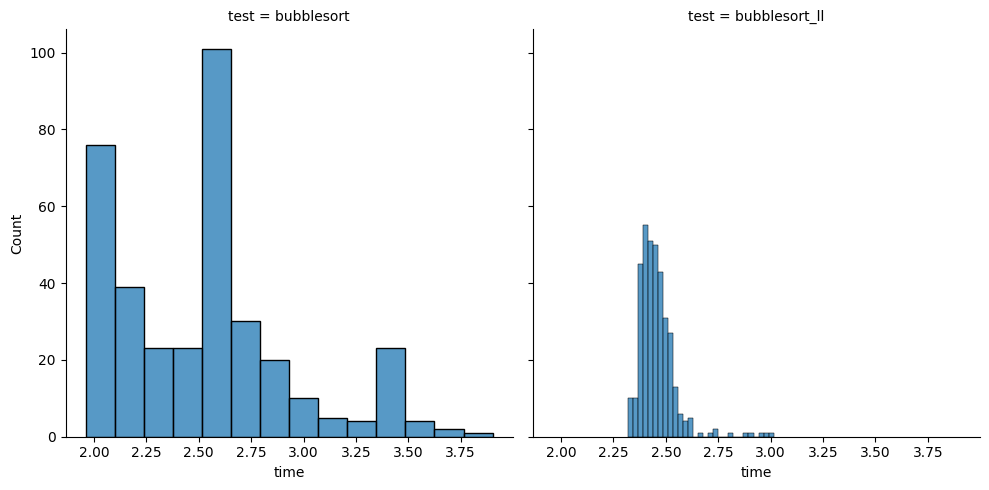

In [ ]:
#4 Boxplot af 'time' for hver test type
sns.catplot(x="test", y="time", hue="test", data=data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot af time for bubblesort og bubblesort_ll")
plt.show()

# Histogrammer for at vurdere normalfordeling
g = sns.FacetGrid(data[data['test'].isin(["bubblesort", "bubblesort_ll"])], col="test", height=5)
g.map(sns.histplot, "time")
plt.show()

Boxplot:

Begge grupper viser tegn på skævhed og indeholder flere outliers. Dette indikerer, at dataene ikke følger en pæn normalfordeling.
BubbleSort har en bredere fordeling med mange ekstreme værdier, mens BubbleSort_ll har en mere koncentreret fordeling, men stadig med nogle outliers.

Histogram:

Histogrammerne bekræfter, at dataene ikke er normalt fordelt. BubbleSort-dataene er meget ujævnt fordelt, og BubbleSort_ll-dataene har en tydelig skævhed.

Dataene er ikke normalt fordelt, hvilket betyder, at vi skal bruge en ikke-parametrisk test til at sammenligne grupperne.

Den mest passende test i denne situation vil være Mann-Whitney U Test, da:

Dataene ikke er normalfordelte.
Vi sammenligner to uafhængige grupper.

In [32]:
# Drop NaN værdier fra 'time'
bubblesort_time = data[data["test"] == "bubblesort"]["time"].dropna()
bubblesort_ll_time = data[data["test"] == "bubblesort_ll"]["time"].dropna()

# Mann-Whitney U Test
from scipy import stats
result = stats.mannwhitneyu(bubblesort_time, bubblesort_ll_time)

print(result)


MannwhitneyuResult(statistic=74960.0, pvalue=0.00035855213302219286)


Null-hypotese (H₀): Der er ingen forskel i medianen af tiden mellem BubbleSort og BubbleSort_ll.
Alternativ hypotese (Hₐ): Der er en forskel i medianen af tiden mellem BubbleSort og BubbleSort_ll.
Konklusion: Da p-værdien er lavere end 0.05, afviser vi H₀ og konkluderer, at der er en signifikant forskel i tid mellem de to sorteringsalgoritmer.

5 - Da vi skal sammenligne flere grupper (ikke kun to), og vi ønsker at undersøge forskelle i middelværdier, er ANOVA-testen den korrekte test at bruge.
ANOVA-testen bruges specifikt til at sammenligne middelværdier på tværs af flere grupper for at afgøre, om der er statistisk signifikante forskelle.
Null-hypotese (H₀): Der er ingen forskel i middelværdien af CPU mellem grupperne.
Alternativ hypotese (Hₐ): Der er en forskel i mindst én gruppes middelværdi sammenlignet med de andre.

In [36]:
#5
stats.f_oneway(
    data[data["test"] == "bubblesort"]["CPU"],
    data[data["test"] == "bubblesort_func"]["CPU"],
    data[data["test"] == "bubblesort_ll"]["CPU"],
    data[data["test"] == "bubblesort_ll2"]["CPU"]
)



F_onewayResult(statistic=5641.93769602928, pvalue=0.0)

En F-værdi på 5641.94 er meget høj. Dette indikerer en stor forskel mellem mindst én af gruppernes gennemsnit sammenlignet med de andre. En høj F-værdi betyder, at variationen mellem gruppernes middelværdier er betydeligt større end variationen inden for grupperne.
p-værdi:

En p-værdi på 0.0 (eller meget tæt på 0) betyder, at forskellen mellem grupperne er meget statistisk signifikant.
Da p-værdien er langt under det typiske signifikansniveau på 0.05, kan vi afvise nulhypotesen.
Konklusion
Vi afviser nulhypotesen og konkluderer, at der er en signifikant forskel i CPU-brugen mellem mindst to af grupperne (bubblesort, bubblesort_func, bubblesort_ll, bubblesort_ll2).

ANOVA-testen fortæller dog ikke præcis hvilke grupper, der adskiller sig — blot at der findes en signifikant forskel. Det ville kræve yderligere test for at kunne svare på det.

In [37]:
#6 
# ANOVA test
stats.f_oneway(
    data[data["test"] == "bubblesort"]["time"],
    data[data["test"] == "bubblesort_func"]["time"],
    data[data["test"] == "bubblesort_ll"]["time"],
    data[data["test"] == "bubblesort_ll2"]["time"]
)


F_onewayResult(statistic=2556.3329354127823, pvalue=0.0)

F-værdien:

En høj F-værdi som denne (2556.33) indikerer, at der er stor variation mellem grupperne i forhold til den variation, der findes inden for grupperne. Dette tyder på, at mindst én gruppe adskiller sig markant fra de andre.
p-værdien (0.0):

En p-værdi på 0.0 (som reelt er ekstremt tæt på 0) er langt under den typiske signifikansgrænse på 0.05.
Dette betyder, at vi kan afvise nulhypotesen og konkludere, at der er en signifikant forskel i tidsforbruget mellem mindst to af grupperne.